In [15]:
def CreateCountryColumns(df):
    #отделяем код страны в отдельный столбец:
    #df['assignee'] = df['assignee'].astype('unicode')
    df['country_code'] = df.assignee.str[-3:].str[:-1]
    df['ifRussia'] = np.where(df['country_code']=="RU", u'Российская Федерация', u'Иностранные заявители')
    return df

def WorkOnlyWithGoodPatents(df, good_values):
    #работаем только с хорошими патентами
    df["label"] = pd.to_numeric(df["label"])
    # bad_values = [0.0]
    df_new=df[df.label.isin(good_values)]
    return df_new

def DeleteNanInTitle(df):
    df.dropna(subset=['title'], inplace = True)
    return df

In [68]:
import pandas as pd
import os.path
import glob
import numpy as np

#  стыкуем 22 таблицы в одну:
tables_dir = '.\\all_branches_to_combine\\'                  
all_files = glob.glob(os.path.join(tables_dir, "*.csv"))     
df_from_each_file = (pd.read_csv(f, encoding='cp1251', delimiter='|') for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

qwe=concatenated_df.branch.value_counts().sort_values()
print qwe.index



print "всего патентов: ", concatenated_df.shape[0]
DeleteNanInTitle(concatenated_df)
print "всего патентов после удаления строк с пустыми title: ", concatenated_df.shape[0]

CreateCountryColumns(concatenated_df)

good_values=[1.0, 2.0]
good_table=WorkOnlyWithGoodPatents(concatenated_df, good_values)



Index([u'Тяжелое машиностр.', u'Судостроительная промышленность',
       u'Машиностр.для пищ.и перабат.промышл.', u'Химическая промышленность',
       u'Радиоэлектронная промышленность', u'Автомобильн.промышл.',
       u'Нефтегазовое машиностроение', u'Энергетическое машиностр.**',
       u'Медицинская промышленность', u'Легкая промышленность',
       u'Лесопромышл.комплекс', u'Сельскохоз. и лесное машиностр.',
       u'Строительно-дорожн. техника*', u'Черная металлургия',
       u'Транспортн.машиностр.', u'Станкоинструментальная промышл.',
       u'Детские товары', u'Фармацевтич.промышл.', u'Цветная металлургия',
       u'Гражданск.авиастроение', u'Строит.материалы и строит.конструкц.',
       u'Промышленность обычных вооруж.'],
      dtype='object')
всего патентов:  1684
всего патентов после удаления строк с пустыми title:  1663


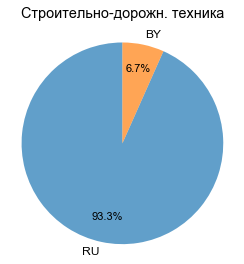

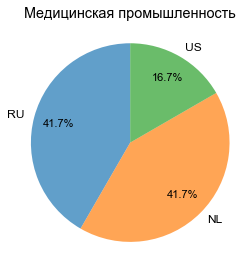

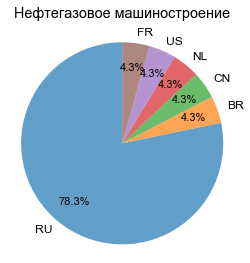

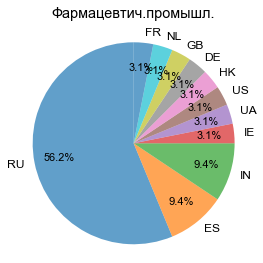

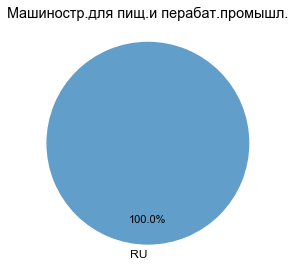

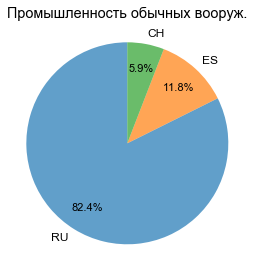

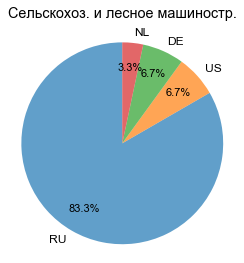

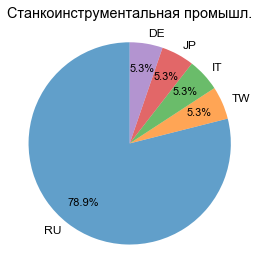

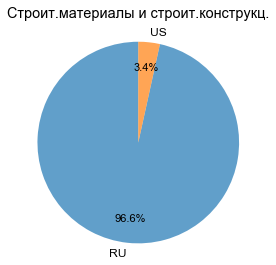

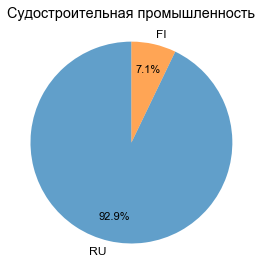

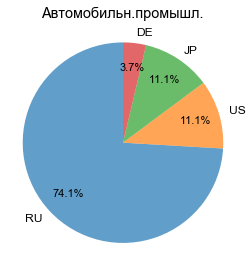

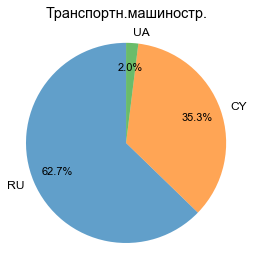

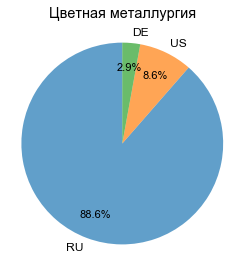

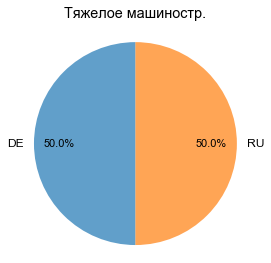

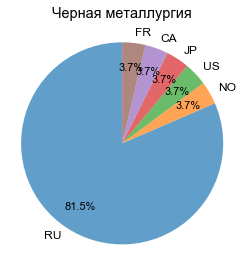

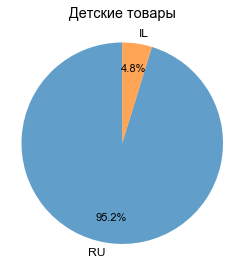

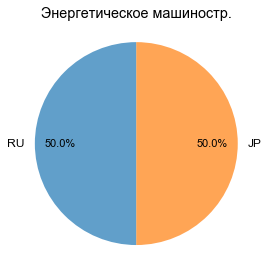

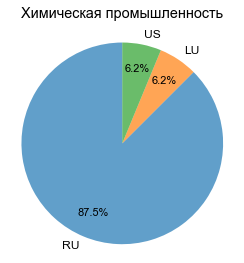

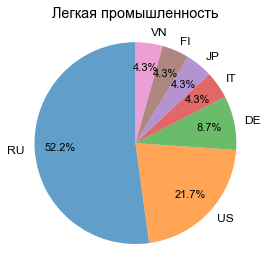

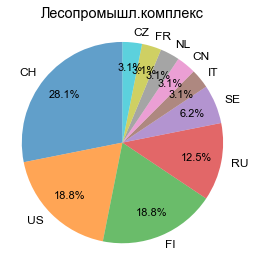

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import cm

#r = np.random.rand(21)*0.8+0.6

all_files = glob.glob("all_branches_to_combine/*.csv")

for i,branch_file in enumerate(all_files):
    table_df = pd.read_csv(branch_file, delimiter='|') 
    branch_name=table_df.iloc[0]["branch"].decode('cp1251').replace('*','')
    # preprop
    DeleteNanInTitle(table_df)
    CreateCountryColumns(table_df)
    good_table=WorkOnlyWithGoodPatents(table_df, good_values=[1.0, 2.0])
    if good_table.shape[0] > 0: 
        fig, ax = plt.subplots(figsize=(4, 4))
        values=good_table['country_code'].value_counts().tolist()
        labels=good_table['country_code'].value_counts().keys().tolist()
        plt.pie(values, labels=labels, autopct="%.1f%%", shadow=False, startangle=90, textprops={'fontsize': 11},
                pctdistance = 0.75, wedgeprops={'alpha':0.7}, labeldistance = 1.1)
        plt.rcParams['font.size'] = 12
        plt.title(branch_name, fontname='Arial', y=1.05)
        plt.axis('equal')
        plot_name="pie_"+branch_name+".png"
        plt.savefig(plot_name+".png", bbox_inches = 'tight')
        
        


вывод диаграм санкей для каждой отрасли

C:\Users\py\Anaconda2\envs\TextMining\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\py\Anaconda2\envs\TextMining\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


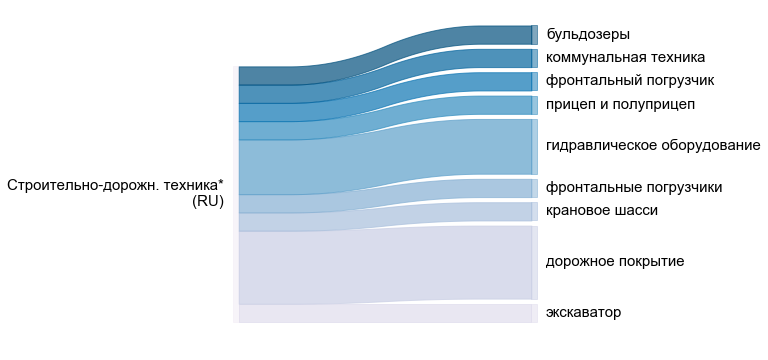

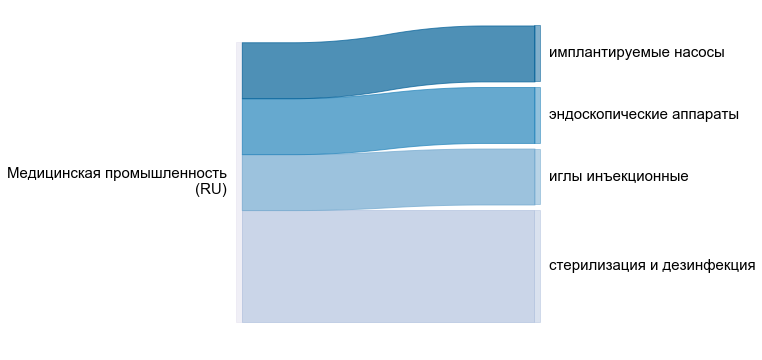

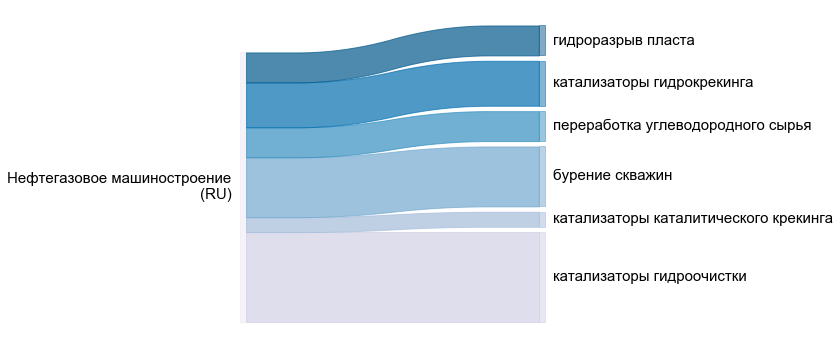

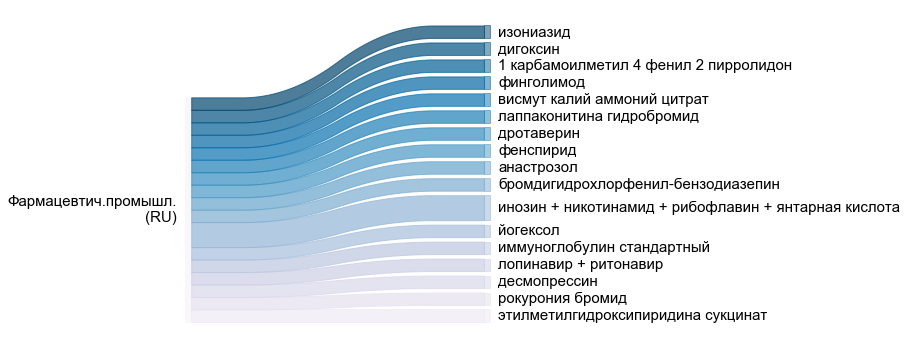

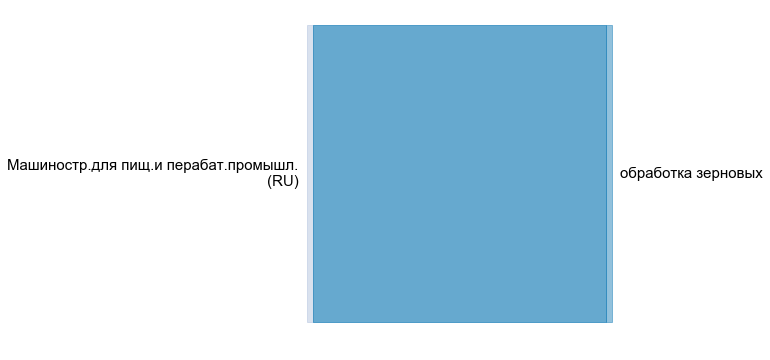

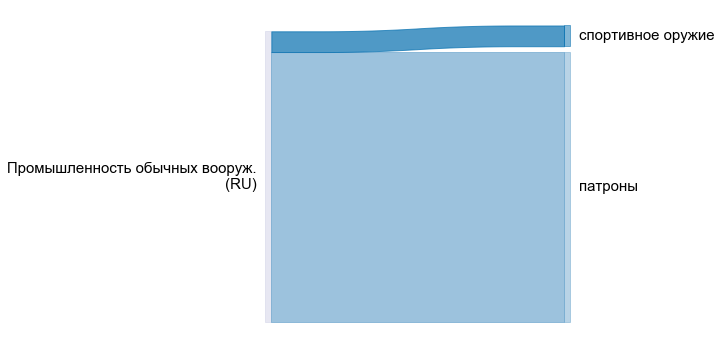

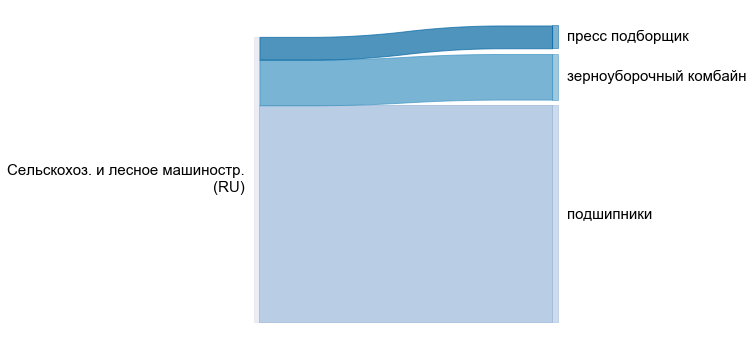

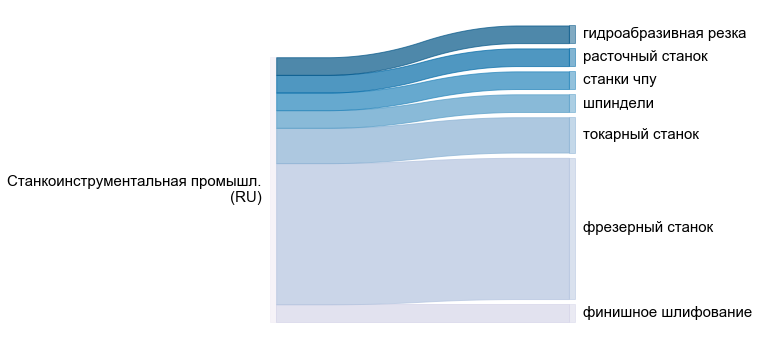

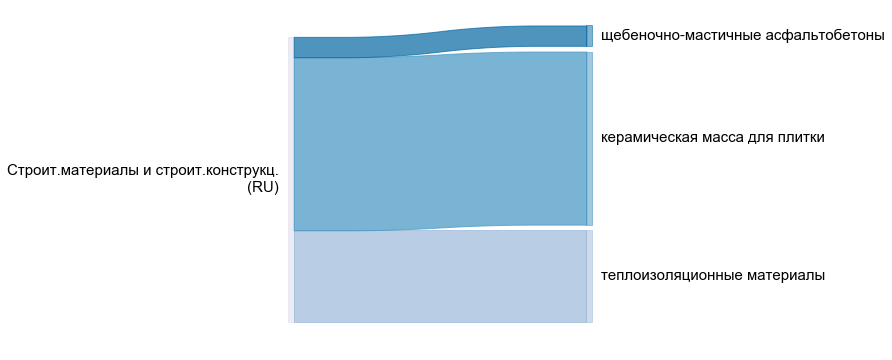

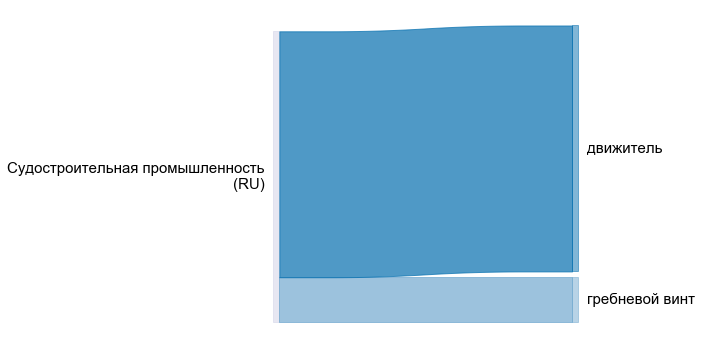

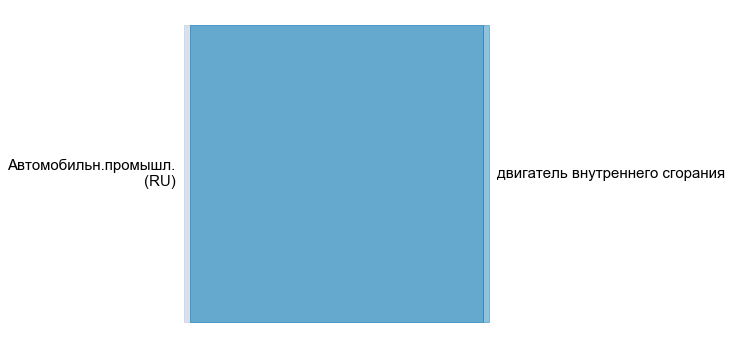

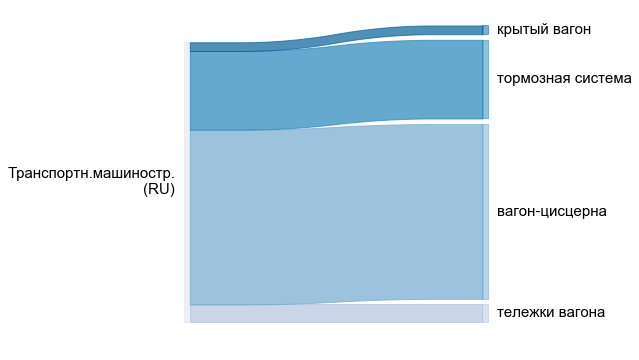

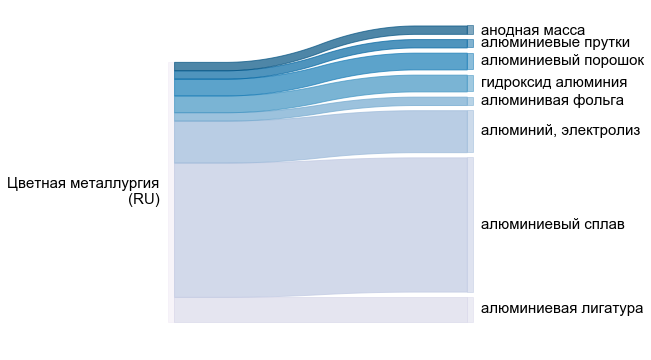

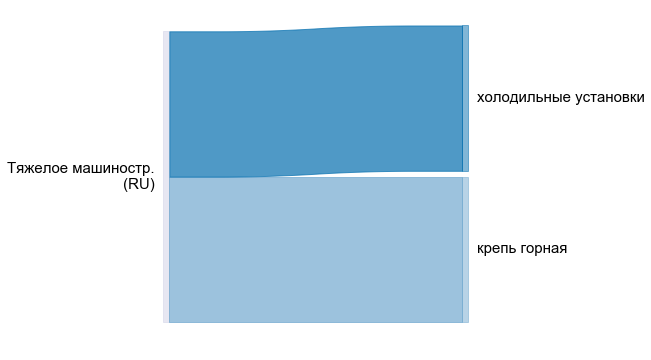

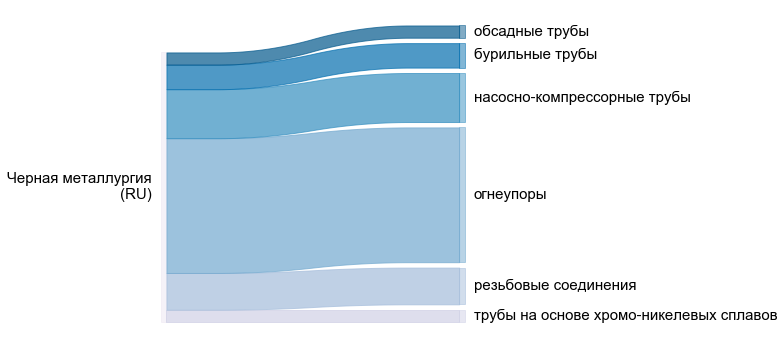

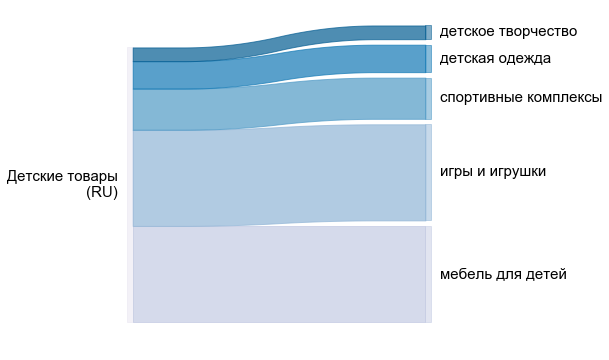

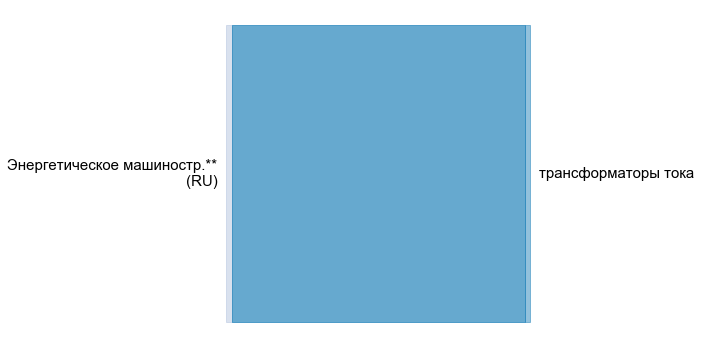

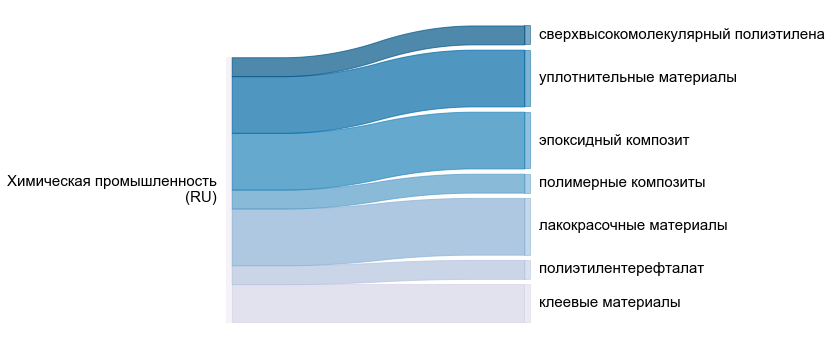

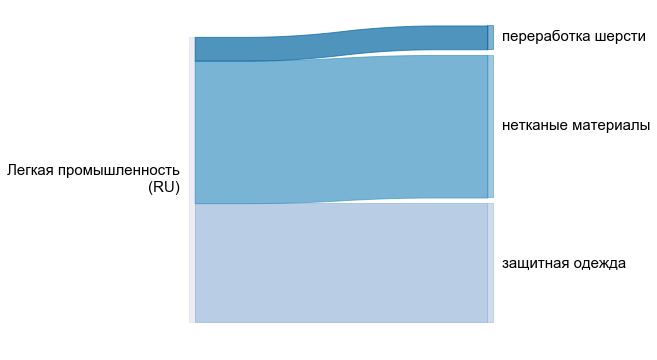

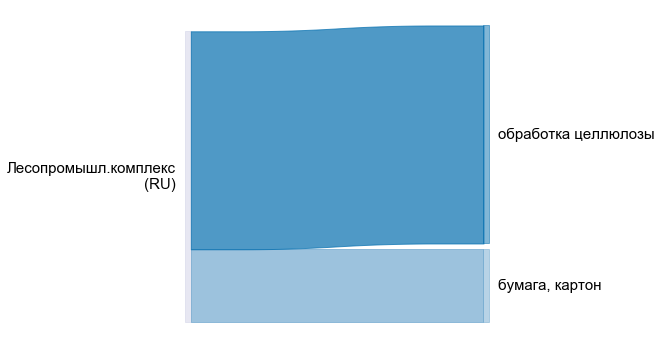

In [2]:
import pandas as pd
from pySankey.sankey import sankey

import glob
import numpy as np

def CreateCountryColumns(df):
    #отделяем код страны в отдельный столбец:
    #df['assignee'] = df['assignee'].astype('unicode')
    df['country_code'] = df.assignee.str[-3:-1]
    df['ifRussia'] = np.where(df['country_code']=="RU", u'Российская Федерация', u'Иностранные заявители')
#     return df

def WorkOnlyWithGoodPatents(df, good_values):
    #работаем только с хорошими патентами
    df["label"] = pd.to_numeric(df["label"])
    # bad_values = [0.0]
    df_new=df[df.label.isin(good_values)]
    return df_new

def DeleteNanInTitle(df):
    df.dropna(subset=['title'], inplace = True)
#     return df


def create_sankey(df, name):
    df['branch'] = df['branch'].astype(str) + '\n (RU)'
    sankey(df['branch'], df['keyword'], colorDict=None, figure_name=name)
    

all_files = glob.glob("all_branches_to_combine/*.csv")

for i,branch_file in enumerate(all_files):
    table_df = pd.read_csv(branch_file,  delimiter='|') # encoding='cp1251',
    
    # preprop
    DeleteNanInTitle(table_df)
    branch_name=table_df.iloc[0]["branch"].decode('cp1251').replace('*','')
    
    CreateCountryColumns(table_df)
    
    table_Russia=table_df.loc[table_df['country_code'] == "RU"]
    
    good_table=WorkOnlyWithGoodPatents(table_Russia, good_values=[1.0, 2.0])
    
    if good_table.shape[0] > 0: 
        create_sankey(good_table, branch_name)
 

Печатаем в таблицу все отрасли с ключевыми словами

In [52]:

all_files = glob.glob("all_branches_to_combine/*.csv")

# создаем датафрейм для всех отраслей и ключевыми словами по каждой отрасли 
combined_keyword_df=pd.DataFrame(columns=['branch', 'RU_ratio', 'combined_keywords'])
combined_keyword_df['keyword_count']=pd.Series()
combined_keyword_df['mean_value']=pd.Series()
combined_keyword_df['sum_value']=pd.Series()

for i,branch_file in enumerate(all_files):
    table_df = pd.read_csv(branch_file,  encoding='cp1251', delimiter='|')  
    
    # preprop
    DeleteNanInTitle(table_df)
    branch_name=table_df.iloc[0]["branch"]
    
    
    good_table=WorkOnlyWithGoodPatents(table_df, good_values=[1.0, 2.0])
    CreateCountryColumns(good_table)
   
    # считаем долю российских патентов:
    Ru_ratio_series=good_table.groupby(['ifRussia'])['ifRussia'].count()
      
    if len(Ru_ratio_series)==2:
        summ= Ru_ratio_series[u'Иностранные заявители']+Ru_ratio_series[u'Российская Федерация']
        Ru_ratio= Ru_ratio_series[u'Российская Федерация']*1.0/summ
    if len(Ru_ratio_series)==0: 
        Ru_ratio=float('NaN')
    if len(Ru_ratio_series)==1 and Ru_ratio_series[u'Российская Федерация']>0: 
        Ru_ratio=1
        
 
    
    table_Russia=good_table.loc[good_table['country_code'] == "RU"]
    
    
    
    values=good_table['keyword'].value_counts().tolist()
    labels=good_table['keyword'].value_counts().keys().tolist() 
    
    good_table['label']=good_table['label']/2
    
    row = [branch_name, Ru_ratio, '; '.join(labels), len(labels), good_table['label'].mean(), good_table['label'].sum()]
    combined_keyword_df.loc[len(combined_keyword_df)] = row
    combined_keyword_df.sort_values(by=['branch'], inplace=True)
    
    
combined_keyword_df.to_csv("combined_branches_keywords.csv", sep='|', encoding='cp1251', index=False, header=False)    
combined_keyword_df

C:\Users\py\Anaconda2\envs\TextMining\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\py\Anaconda2\envs\TextMining\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\py\Anaconda2\envs\TextMining\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,branch,RU_ratio,combined_keywords,keyword_count,mean_value,sum_value
11,Автомобильн.промышл.,0.740741,двигатель внутреннего сгорания; тормозная система,2.0,0.888889,24.0
15,Гражданск.авиастроение,NaN,,0.0,NaN,0.0
17,Детские товары,0.952381,игры и игрушки; мебель для детей; спортивные к...,5.0,0.952381,20.0
20,Легкая промышленность,0.521739,нетканые материалы; защитная одежда; обувь; пе...,4.0,0.913043,21.0
21,Лесопромышл.комплекс,0.125000,"обработка целлюлозы; бумага, картон; целлюлозн...",8.0,0.875000,28.0
4,Машиностр.для пищ.и перабат.промышл.,1.000000,обработка зерновых,1.0,0.833333,2.5
1,Медицинская промышленность,0.416667,ультразвуковая аппаратура; стерилизация и дези...,7.0,0.791667,9.5
2,Нефтегазовое машиностроение,0.782609,бурение скважин; катализаторы гидроочистки; ги...,7.0,1.000000,23.0
5,Промышленность обычных вооруж.,0.823529,патроны; спортивное оружие,2.0,0.823529,14.0
6,Радиоэлектронная промышленность,NaN,,0.0,NaN,0.0


In [21]:
header=['branch', 'name', 'year', 'import_before', 'import_after']
table = pd.read_csv('!tables_all_for_statistics.csv',encoding='cp1251', engine='python', delimiter='|', index_col=False, names=header)
#table['import_before'] = table.import_before.apply(lambda x: x.replace('%',''))
table['import_before'].replace(to_replace='%', value='',inplace=True,regex=True)
table['import_after'].replace(to_replace='%', value='',inplace=True,regex=True)
table["import_before"] = table.import_before.astype(float)
table["import_after"] = table.import_after.astype(float)

table.sort_values(by=['branch'], inplace=True)
combined_keyword_df['items_nums']=count_of_branch_itemses(table)

combined_keyword_df['score']=combined_keyword_df['sum_value']*combined_keyword_df['keyword_count']/combined_keyword_df['items_nums']
combined_keyword_df.set_index('branch', inplace=True)
combined_keyword_df.sort_values(by=['score'], ascending=False)

,combined_keywords,keyword_count,mean_value,sum_value,items_nums,score
branch,,,,,,
Черная металлургия,огнеупоры; насосно-компрессорные трубы; резьбо...,6.0,0.886364,19.5,13,9.000000
Детские товары,мебель для детей; игры и игрушки; спортивные к...,5.0,0.950000,19.0,13,7.307692
Строительно-дорожн. техника*,дорожное покрытие; гидравлическое оборудование...,9.0,0.785714,11.0,15,6.600000
Строит.материалы и строит.конструкц.,керамическая масса для плитки; теплоизоляционн...,3.0,0.678571,19.0,9,6.333333
Промышленность обычных вооруж.,патроны; спортивное оружие,2.0,0.785714,11.0,4,5.500000
Цветная металлургия,"алюминиевый сплав; алюминий, электролиз; алюми...",8.0,0.806452,25.0,48,4.166667
Транспортн.машиностр.,вагон-цисцерна; тормозная система; тележки ваг...,4.0,0.812500,26.0,26,4.000000
Станкоинструментальная промышл.,фрезерный станок; токарный станок; расточный с...,7.0,0.933333,14.0,34,2.882353
Нефтегазовое машиностроение,катализаторы гидроочистки; бурение скважин; ка...,6.0,1.000000,18.0,55,1.963636


In [6]:
def count_of_branch_itemses(df):
    counted_branches=df.groupby(['branch'])['branch'].count()
    return counted_branches.tolist()

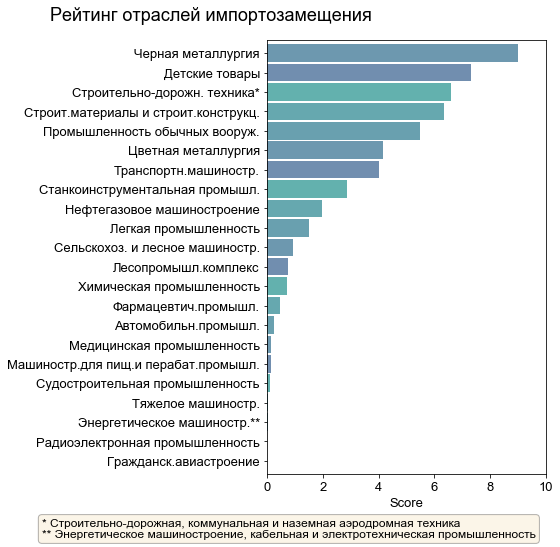

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import cm



combined_keyword_df = combined_keyword_df.sort_values('score',ascending=True)
#----
colors = plt.cm.viridis(np.linspace(0.3, 0.5, 5))
ax=combined_keyword_df['score'].plot(kind='barh', figsize=(5,8), width=0.9, color=colors, alpha=0.7)
ax.set_title(u'Рейтинг отраслей импортозамещения', fontname='Arial', fontsize= 18, x=-0.2, y=1.03) # title of plot

ax.set_xticks(ax.get_xticks()[::1])  # показывать х-метки через один

props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(-0.5, 0.015, u'* Строительно-дорожная, коммунальная и наземная аэродромная техника\n** Энергетическое машиностроение, кабельная и электротехническая промышленность', 
        fontsize=12, fontname='Arial', transform=plt.gcf().transFigure, bbox=props)


plt.ylabel("")
plt.xlabel("Score", fontsize=13)

#ax.get_yaxis().set_visible(False)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(13)

plt.savefig('RatingBranches.png', bbox_inches = 'tight')

In [19]:
all_files = glob.glob("all_branches_to_combine/*.csv")



for i,branch_file in enumerate(all_files):
    table_df = pd.read_csv(branch_file,  encoding='cp1251', delimiter='|')  
    
    # preprop
    DeleteNanInTitle(table_df)
    branch_name=table_df.iloc[0]["branch"]
    
    CreateCountryColumns(table_df)
    table_Russia=table_df.loc[table_df['country_code'] == "RU"]
    
    good_table=WorkOnlyWithRelevantPatents(table_Russia, good_values=[1.0])
    
    qwe=good_table.groupby(['label'])['label'].count()
    
    
        
    print branch_name, qwe

C:\Users\py\Anaconda2\envs\TextMining\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Строительно-дорожн. техника* label
0.0    22
1.0     6
2.0     8
Name: label, dtype: int64
Медицинская промышленность label
0.0    10
1.0     1
2.0     4
Name: label, dtype: int64
Нефтегазовое машиностроение label
0.0     8
2.0    18
Name: label, dtype: int64
Фармацевтич.промышл. label
0    66
1     2
2    16
Name: label, dtype: int64
Машиностр.для пищ.и перабат.промышл. label
0    10
1     1
2     2
Name: label, dtype: int64
Промышленность обычных вооруж. label
0.0    136
1.0      5
2.0      7
Name: label, dtype: int64
Радиоэлектронная промышленность Series([], Name: label, dtype: int64)
Сельскохоз. и лесное машиностр. label
0.0     8
1.0    15
2.0    10
Name: label, dtype: int64
Станкоинструментальная промышл. label
0    53
1     2
2    13
Name: label, dtype: int64
Строит.материалы и строит.конструкц. label
0    158
1     18
2     10
Name: label, dtype: int64
Судостроительная промышленность label
0     2
1    13
Name: label, dtype: int64
Автомобильн.промышл. label
0.0     3
1.0     3

In [18]:
def WorkOnlyWithRelevantPatents(df, good_values):
    #работаем только с хорошими патентами
    df["label_general"] = pd.to_numeric(df["label_general"])
    # bad_values = [0.0]
    df_new=df[df.label_general.isin(good_values)]
    return df_new